Sediment Cores from Literature c:

In [1]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
#
from Calculations_Functions import proportions_from_filename, metrics_table
from matplotlib.colors import ListedColormap
from scipy.optimize import curve_fit
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')

In [2]:
import Regions_functions_V2
from Regions_functions_V2 import vertical_mean_total_profiles, vertical_status_profiles, plot_vertical_total_state_profiles, plot_vertical_state_status, interpolate_volume_profile 

/tmp/ipykernel_733554/2280904927.py:40: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


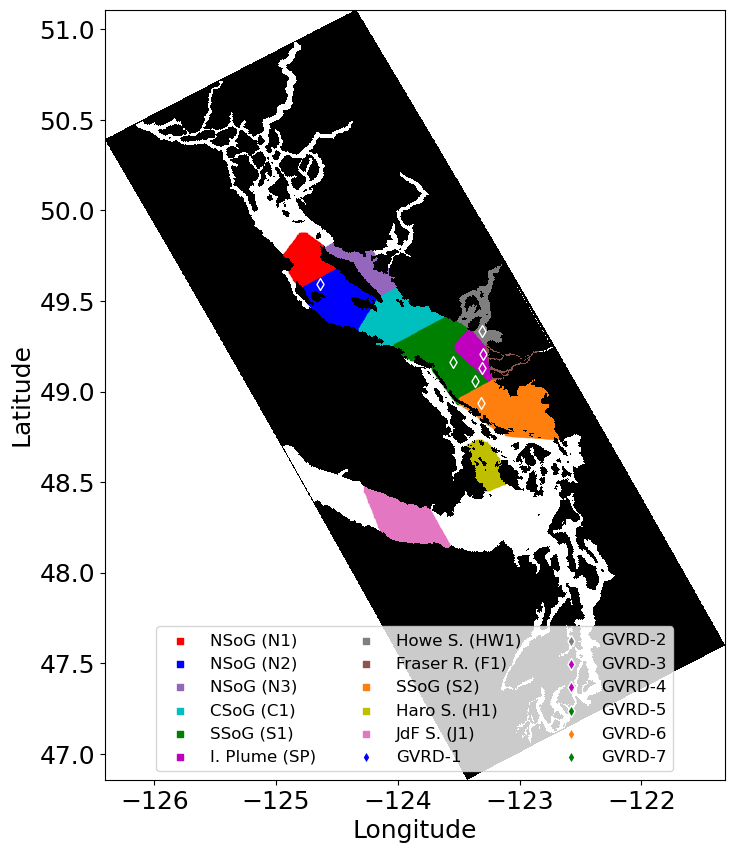

In [3]:
depths_cores = np.array([169, 76, 83, 84, 388, 187, 233])
values_cores = np.array([671, 1793, 12647, 1105, 539, 728, 271]) # pg / g
lon_cores = (-1) * np.array([124 + (38.282/60), 123 + (18.517/60), 123 + (17.991/60), 123 + (18.718/60), 123 + (32.731/60), 123 + (18.812/60), 123 + (22.162/60)])
lat_cores = np.array([49 + (35.515/60), 49 + (19.902/60), 49 + (12.467/60), 49 + (7.778/60), 49 + (9.877/60), 48 + (56.192/60), 49 + (3.340/60)])
cores_labels = ['GVRD-1', 'GVRD-2', 'GVRD-3', 'GVRD-4', 'GVRD-5', 'GVRD-6', 'GVRD-7']
#############################################################################################
lon_NSoG_N1, lat_NSoG_N1 = Regions_functions_V2.lon_NSoG_N1, Regions_functions_V2.lat_NSoG_N1
lon_NSoG_N2, lat_NSoG_N2 = Regions_functions_V2.lon_NSoG_N2, Regions_functions_V2.lat_NSoG_N2
lon_NSoG_N3, lat_NSoG_N3 = Regions_functions_V2.lon_NSoG_N3, Regions_functions_V2.lat_NSoG_N3
lon_CSoG_C1, lat_CSoG_C1 = Regions_functions_V2.lon_CSoG_C1, Regions_functions_V2.lat_CSoG_C1
lon_SSoG_S1, lat_SSoG_S1 = Regions_functions_V2.lon_SSoG_S1, Regions_functions_V2.lat_SSoG_S1
lon_SSoG_SP, lat_SSoG_SP = Regions_functions_V2.lon_SSoG_SP, Regions_functions_V2.lat_SSoG_SP
lon_SSoG_S2, lat_SSoG_S2 = Regions_functions_V2.lon_SSoG_S2, Regions_functions_V2.lat_SSoG_S2
lon_Haro_H1, lat_Haro_H1 = Regions_functions_V2.lon_Haro_H1, Regions_functions_V2.lat_Haro_H1
lon_Juan_J1, lat_Juan_J1 = Regions_functions_V2.lon_Juan_J1, Regions_functions_V2.lat_Juan_J1
lon_Fraser_F1, lat_Fraser_F1 = Regions_functions_V2.lon_Fraser_F1, Regions_functions_V2.lat_Fraser_F1
lon_Howe_HW1, lat_Howe_HW1 = Regions_functions_V2.lon_Howe_HW1, Regions_functions_V2.lat_Howe_HW1
#########
colors_regions = ['r', 'b', 'tab:purple', 'c', 'g','m', 'tab:gray','tab:brown', 'tab:orange', 'y', 'tab:pink']
regions = ['NSoG (N1)', 'NSoG (N2)',  'NSoG (N3)', 'CSoG (C1)', 'SSoG (S1)', 'I. Plume (SP)', 'Howe S. (HW1)', 'Fraser R. (F1)', 'SSoG (S2)', 'Haro S. (H1)', 'JdF S. (J1)']
coords = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')
colors = [(0, 0, 0, 1),  # Black for land (1)
          (0, 0, 0, 0)]  # Transparent for water (0)
cmap = ListedColormap(colors)
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize = (8,10))
ax.scatter(lon_NSoG_N1, lat_NSoG_N1, c = colors_regions[0], s = 20, marker = 's', label=regions[0])
ax.scatter(lon_NSoG_N2, lat_NSoG_N2, c = colors_regions[1],s = 20,  marker = 's', label=regions[1])
ax.scatter(lon_NSoG_N3, lat_NSoG_N3, c = colors_regions[2],s = 20,  marker = 's', label=regions[2])
ax.scatter(lon_CSoG_C1, lat_CSoG_C1, c = colors_regions[3],s = 20, marker = 's', label=regions[3])
ax.scatter(lon_SSoG_S1, lat_SSoG_S1, c = colors_regions[4],s = 20, marker = 's', label=regions[4])
ax.scatter(lon_SSoG_SP, lat_SSoG_SP, c = colors_regions[5],s = 20, marker = 's', label=regions[5])
ax.scatter(lon_Howe_HW1, lat_Howe_HW1,c = colors_regions[6], s = 20, marker = 's', label=regions[6])
ax.scatter(lon_Fraser_F1, lat_Fraser_F1, c = colors_regions[7], s = 20, marker = 's',label=regions[7])
ax.scatter(lon_SSoG_S2, lat_SSoG_S2,c = colors_regions[8], s = 20 ,marker = 's', label=regions[8])
ax.scatter(lon_Haro_H1, lat_Haro_H1,c = colors_regions[9],s = 20,marker = 's', label=regions[9])
ax.scatter(lon_Juan_J1, lat_Juan_J1, c = colors_regions[10],s = 20,marker = 's', label=regions[10])
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
#
color_cores = ['b', 'tab:gray', 'm','m', 'g','tab:orange', 'g']
for i in range(len(values_cores)):
    ax.scatter(lon_cores[i], lat_cores[i], marker = 'd', edgecolors='w', c = color_cores[i], label = cores_labels[i])
#    
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#
#
ax.legend(loc = 'lower center', fontsize = 12, ncol = 3)

Lets get a value for each region :D

In [4]:
NSoG = values_cores[0]
SSoGa = np.median(np.array([values_cores[4] , values_cores[6]]))
IPlume = np.median(np.array([values_cores[2] , values_cores[3]]))
HWSound = values_cores[1]
SSoGb = values_cores[5]
r_labels = ['NSoG', 'SSoGa', 'SSoGb', 'IPlume', 'HWSound']
r_colors = ['b', 'g', 'tab:orange', 'm', 'tab:gray']

In [5]:
filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_release_run_tau_0_01_ratio_0_2_sv_5_AD_0_052.zarr'
polygon_dict = Regions_functions_V2.polygon_definition(filename)
volumes_regions_depths = Regions_functions_V2.volume_by_depth_all_regions(polygon_dict)
#
def interpolate_volume_profile(volume_profile, number_of_depths):
    # Get the existing depth coordinate values (z-levels mapped to actual depth)
    depth_vals = volume_profile['depth'].values
    volume_vals = volume_profile.values

    # Filter out NaNs
    valid = ~np.isnan(depth_vals) & ~np.isnan(volume_vals)
    depth_vals = depth_vals[valid]
    volume_vals = volume_vals[valid]

    # Define new depth bins (higher resolution)
    new_depths = np.linspace(depth_vals.min(), depth_vals.max(), number_of_depths)

    # Interpolate depths
    interp_volume_vals = np.interp(new_depths, depth_vals, volume_vals)
    #
    interpolated_volume = xr.DataArray(
        interp_volume_vals,
        coords={'depth': new_depths},
        dims='depth',
        name='volume'
    )

    return interpolated_volume, new_depths
##################
depth_bins_regions = 81
#####
volume_N1, depths_N1 = interpolate_volume_profile(volumes_regions_depths['N1'], depth_bins_regions)
volume_N2, depths_N2 = interpolate_volume_profile(volumes_regions_depths['N2'], depth_bins_regions)
volume_N3, depths_N3 = interpolate_volume_profile(volumes_regions_depths['N3'], depth_bins_regions)
volume_C1, depths_C1 = interpolate_volume_profile(volumes_regions_depths['C1'], depth_bins_regions)
volume_S1, depths_S1 = interpolate_volume_profile(volumes_regions_depths['S1'], depth_bins_regions)
volume_SP, depths_SP = interpolate_volume_profile(volumes_regions_depths['SP'], depth_bins_regions)
volume_HW1, depths_HW1 = interpolate_volume_profile(volumes_regions_depths['HW1'], depth_bins_regions)
volume_F1, depths_F1 = interpolate_volume_profile(volumes_regions_depths['F1'], depth_bins_regions)
volume_S2, depths_S2 = interpolate_volume_profile(volumes_regions_depths['S2'], depth_bins_regions)
volume_H1, depths_H1 = interpolate_volume_profile(volumes_regions_depths['H1'], depth_bins_regions)
volume_J1, depths_J1 = interpolate_volume_profile(volumes_regions_depths['J1'], depth_bins_regions)
#################
status_vertical_N1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['N1'], depth_bin_edges=depths_N1)
status_vertical_N2 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['N2'], depth_bin_edges=depths_N2)
status_vertical_N3 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['N3'], depth_bin_edges=depths_N3)
status_vertical_C1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['C1'], depth_bin_edges=depths_C1)
status_vertical_S1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['S1'], depth_bin_edges=depths_S1)
status_vertical_SP = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['SP'], depth_bin_edges=depths_SP)
status_vertical_HW1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['HW1'], depth_bin_edges=depths_HW1)
status_vertical_F1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['F1'], depth_bin_edges=depths_F1)
status_vertical_S2 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['S2'], depth_bin_edges=depths_S2)
status_vertical_H1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['H1'], depth_bin_edges=depths_H1)
status_vertical_J1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['J1'], depth_bin_edges=depths_J1)

In [6]:
volumes_regions, _ = Regions_functions_V2.volumes()

In [7]:
NSoG_OP = status_vertical_N2['Particles Status 11'].sum() + status_vertical_N2['Particles Status 12'].sum() + status_vertical_N2['Particles Status 13'].sum() 
SSoGa_OP = status_vertical_S1['Particles Status 11'].sum() + status_vertical_S1['Particles Status 12'].sum() + status_vertical_S1['Particles Status 13'].sum()
SSoGb_OP = status_vertical_S2['Particles Status 11'].sum() + status_vertical_S2['Particles Status 12'].sum() + status_vertical_S2['Particles Status 13'].sum() 
IPlume_OP = status_vertical_SP['Particles Status 11'].sum() + status_vertical_SP['Particles Status 12'].sum() + status_vertical_SP['Particles Status 13'].sum() 
HWSound_OP = status_vertical_HW1['Particles Status 11'].sum() + status_vertical_HW1['Particles Status 12'].sum() + status_vertical_HW1['Particles Status 13'].sum()  

In [8]:
volumes_regions

[89173346186.0,
 140357133727.0,
 84358912625.0,
 211137076346.0,
 287736192242.0,
 45176378875.0,
 55047467542.0,
 662004317.0,
 110993373153.0,
 25144398451.0,
 107815582879.0]

/tmp/ipykernel_733554/1583033829.py:36: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axins.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


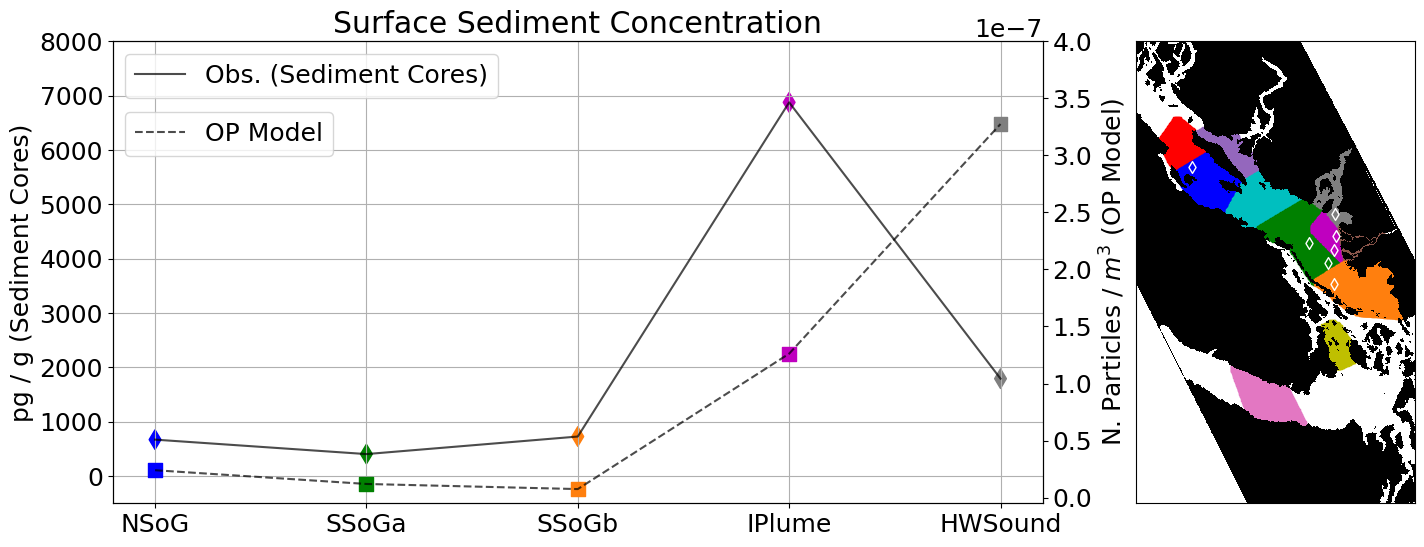

In [11]:
obs = [NSoG, SSoGa, SSoGb, IPlume, HWSound]
OP_model = [NSoG_OP / volumes_regions[1], SSoGa_OP / volumes_regions[4], SSoGb_OP / volumes_regions[8], IPlume_OP / volumes_regions[5], HWSound_OP / volumes_regions[6]]

fig, ax = plt.subplots(figsize = (12,6))
#
ax.plot(r_labels, obs, '-k', alpha = .7, label = 'Obs. (Sediment Cores)')
ax.scatter(r_labels, obs, c = r_colors, marker = 'd', s = 100)
axis = ax.twinx()
#
axis.plot(r_labels, OP_model, '--k', alpha = .7, label = 'OP Model')
axis.scatter(r_labels, OP_model, c = r_colors, marker = 's', s = 100)
#
ax.legend(loc = 'upper left')
axis.legend(loc = 'center left', bbox_to_anchor=(0, .8))
ax.grid()
ax.set_title('Surface Sediment Concentration')
axis.set_ylabel('N. Particles / $m^{3}$ (OP Model)')
ax.set_ylabel('pg / g (Sediment Cores)')
#
ax.set_ylim([-500,8000])
axis.set_ylim([-0.5e-8, 4e-7])

#
axins = ax.inset_axes([1.1, 0, 0.3, 1])
axins.scatter(lon_NSoG_N1, lat_NSoG_N1, c = colors_regions[0], s = 20, marker = 's', label=regions[0])
axins.scatter(lon_NSoG_N2, lat_NSoG_N2, c = colors_regions[1],s = 20,  marker = 's', label=regions[1])
axins.scatter(lon_NSoG_N3, lat_NSoG_N3, c = colors_regions[2],s = 20,  marker = 's', label=regions[2])
axins.scatter(lon_CSoG_C1, lat_CSoG_C1, c = colors_regions[3],s = 20, marker = 's', label=regions[3])
axins.scatter(lon_SSoG_S1, lat_SSoG_S1, c = colors_regions[4],s = 20, marker = 's', label=regions[4])
axins.scatter(lon_SSoG_SP, lat_SSoG_SP, c = colors_regions[5],s = 20, marker = 's', label=regions[5])
axins.scatter(lon_Howe_HW1, lat_Howe_HW1,c = colors_regions[6], s = 20, marker = 's', label=regions[6])
axins.scatter(lon_Fraser_F1, lat_Fraser_F1, c = colors_regions[7], s = 20, marker = 's',label=regions[7])
axins.scatter(lon_SSoG_S2, lat_SSoG_S2,c = colors_regions[8], s = 20 ,marker = 's', label=regions[8])
axins.scatter(lon_Haro_H1, lat_Haro_H1,c = colors_regions[9],s = 20,marker = 's', label=regions[9])
axins.scatter(lon_Juan_J1, lat_Juan_J1, c = colors_regions[10],s = 20,marker = 's', label=regions[10])
axins.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
axins.set_xlim([mask['nav_lon'].mean() - 1.3, mask['nav_lon'].mean() + 1.3])
axins.set_ylim([mask['nav_lat'].mean() - 1.3, mask['nav_lat'].mean() + 1.3])

#
color_cores = ['b', 'tab:gray', 'm','m', 'g','tab:orange', 'g']
for i in range(len(values_cores)):
    axins.scatter(lon_cores[i], lat_cores[i], marker = 'd', edgecolors='w', c = color_cores[i], label = cores_labels[i])
#    
axins.tick_params(which='both',bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


This is comparing the concentration of a core sediment at an exact location vs the sum of all particles on the sediment in the whole enclosed region ...

Maybe it's not the best to do, but helps to see if the "concentration distribution" is correct or at least makes sense c:

HUGE NOTE: Core sediments were taken between 2002 and 2003...This means that a LOT of PBDEs were still being released :O ---> Maybe that's why the IPlume region is way higher in the obs than in the OP model. Also, we are just adding Sewage Particles on the first 30 days for these simulations... if we add a continuous release, then the total of sedimented particles at the Plume region should increase a lot :D

Since we cannot compare value vs value... if we focus more on the distributions or ratios between regions, these can give us a better picture c: